# Data Cleaning, feature engineering

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import datetime as dt
from math import ceil
pd.set_option('max_colwidth', None)

In [3]:
from DataCleaningScript import *
my_perpross = pre_processing()

In [4]:
my_perpross.train_X

,Amount,Value,PricingStrategy,Day,Hour,week_day,weeks,BatchId,AccountId,SubscriptionId,...,9,10,11,12,13,14,15,16,17,18
TransactionId,,,,,,,,,,,,,,,,,,,,,
82059,2500.0,2500,2,28,10,4,4,48408,2946,3991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
115282,1000.0,1000,2,9,7,2,2,5122,4468,3787,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
36103,2000.0,2000,2,15,15,5,2,117608,3750,3024,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5655,-1000.0,1000,2,24,8,5,4,75137,4841,3829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
87110,-5000.0,5000,2,7,6,4,1,84248,4841,3829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,2000.0,2000,4,8,20,5,1,124507,575,4369,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
68325,-50.0,50,2,29,8,5,4,94167,4841,3829,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
62369,1500.0,1500,2,27,17,3,4,85767,571,873,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [5]:
def score_dataset(X_train, X_valid, y_train, y_valid):#fucntion to test but have to improve
    model = RandomForestClassifier(random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    return mean_absolute_error(y_valid, preds)

In [6]:
def delete_col_unique_val(X, printable=False):
    cols_unique_value = []

    for col in X.columns : 
        if len(X[col].unique()) == 1:
            cols_unique_value.append(col)
        else :
            pass
    if printable :
        print(f'The colomns : {cols_unique_value} have only one value and have been dropped')

    X.drop(cols_unique_value, axis=1, inplace=True)
    return X

In [7]:
def week_of_month(dt):
    #Returns the week of the month for the specified date.

    first_day = dt.replace(day=1)

    dom = dt.day
    week_day = first_day.weekday()#monday = 0
    adjusted_dom = dom + week_day
    
    if week_day>=5:
        return int(ceil(adjusted_dom/7.0)) - 1
    else:
        return int(ceil(adjusted_dom/7.0))

In [8]:
def adding_date_col(X, date_col):
    day = [i.day for i in X[date_col]]
    hour = [i.hour for i in X[date_col]]
    l_week = [week_of_month(x) for x in X[date_col].tolist()]
    X['Day'] = day
    X['Hour'] = hour
    X['week_day'] = X[date_col].dt.dayofweek
    X["weeks"] = l_week
    return X

In [9]:
def added_column(describe):
    """
    Function to add information on  new columns and keep the describe's df updated
    If there is a missing data in one column, replace it with : np.nan
    """
    new_col = [
        ["Day", "The day in the month of the transaction", "int64", np.nan],
        ["Hour", "The hour of the transaction", "int64", np.nan],
        ["week_day", "The day of the week of the transaction", "int64", np.nan],
        ["weeks", "The week of the month of the transaction", "int64", np.nan]
    ]
    df1 = pd.DataFrame(new_col, columns=['Column Name', 'Definition', "Dtype", "unique"])
    describe = pd.concat([describe, df1])
    describe.reset_index(inplace=True)
    describe.drop(['index'], axis=1, inplace=True) #Only the features data
    return describe
    

In [10]:
def TransactionIdToIndex(data):
    data[['dc', 'new_index']] = data.TransactionId.str.split("_", expand = True)
    data.drop(['dc','TransactionId'], inplace=True, axis=1)
    data.rename(columns={"new_index": "TransactionId"}, inplace=True)
    data.set_index('TransactionId', inplace=True)
    return data

In [11]:
def composed_string_to_id(column_name, data):
    """
    For columns with value e.g. : BatchId_345
    To transform into 345
    """
    data[['dc', 'new_col']] = data[column_name].str.split("_", expand = True)
    data.drop(['dc','column_name'], inplace=True, axis=1)
    data.rename(columns={"new_col": "column_name"}, inplace=True)
    return data

In [12]:
def dataloading_and_cleaning(printable=False, one_hot_encoder = True):#Si on est courageaux on transforme ca en classe ... :')

    #Data loading
    def_feature = pd.read_csv("input/Xente_Variable_Definitions.csv")
    raw_data = pd.read_csv("input/training.csv")
    X_test = pd.read_csv("input/test.csv")
    sample_submission = pd.read_csv("input/sample_submission.csv")

    #Data transformation
    raw_data['TransactionStartTime'] = pd.to_datetime(raw_data['TransactionStartTime'])
    X_test['TransactionStartTime'] = pd.to_datetime(X_test['TransactionStartTime'])

    #Data cleaning
    data = raw_data.copy()
    data = data.dropna(axis=0) #Drop observations/rows with missing values
    data = delete_col_unique_val(data) #deal with unique values

    #Set the df index to the Transction Id
    data = TransactionIdToIndex(data)
    X_test = TransactionIdToIndex(X_test)

    #Adding data
    data = adding_date_col(data, 'TransactionStartTime')
    X_test = adding_date_col(X_test, 'TransactionStartTime')


    # "Cardinality" means the number of unique values in a column
    # Select categorical columns with relatively low cardinality (convenient but arbitrary)
    low_cardinality_cols = [cname for cname in data.columns if data[cname].nunique() < 15 and 
                            data[cname].dtype == "object"]

    #transform columns BatchId_54 to number
    l_col_str = ["BatchId", "AccountId", "SubscriptionId", "CustomerId", "ProviderId", "ProductId", "ChannelId"]
    for col in l_col_str:
        data[['dc', 'new_col']] = data[col].str.split("_", expand = True)
        data.drop(['dc',col], inplace=True, axis=1)
        data.rename(columns={"new_col": col}, inplace=True)
        X_test[['dc', 'new_col']] = X_test[col].str.split("_", expand = True)
        X_test.drop(['dc',col], inplace=True, axis=1)
        X_test.rename(columns={"new_col": col}, inplace=True)	

    #Data splitting
    y = data.FraudResult #The target label
    X = data.copy()
    X.drop(['FraudResult'], axis=1, inplace=True) #Only the features data
    train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

    #Other data
    #Information on columns on raw_data
    ## P-e transformer ca en une fonction ? 
    info = pd.DataFrame(data = raw_data.dtypes)
    info.reset_index(inplace=True)
    info.rename({'index':'Column Name', 0: 'Dtype'}, axis=1, inplace=True)
    describe = def_feature.copy()
    describe = describe.merge(info)
    unique_val = []
    for col in list(describe["Column Name"]) : 
        unique_val.append(len(raw_data[col].unique()))
    describe["unique"]=unique_val
    describe = added_column(describe)
    cat_cols = [col for col in train_X.columns if train_X[col].dtype == "object"]#liste of obejct columns
    cat_cols.append("PricingStrategy")#pcq mm si c'est un chiffre il faut le considérer comme une catégorie
    
    if(printable):
        print(describe)
        
    if one_hot_encoder:
        medium_cardianlity_cols = ["ProductId"]
        #low_cardinality_cols=["ProviderId", "ProductCategory", "ChannelId", "PricingStrategy"] 
        train_X[low_cardinality_cols] = train_X[low_cardinality_cols].astype(str) 
        val_X[low_cardinality_cols] = val_X[low_cardinality_cols].astype(str) 

        OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
        OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_X[low_cardinality_cols]))
        OH_cols_valid = pd.DataFrame(OH_encoder.transform(val_X[low_cardinality_cols]))
        # One-hot encoding removed index; put it back
        OH_cols_train.index = train_X.index
        OH_cols_valid.index = val_X.index

        # Remove categorical columns (will replace with one-hot encoding)
        print(f'Col avant : {train_X.columns}')
        #num_X_train = train_X.drop(cat_cols, axis=1)

        #num_X_valid = val_X.drop(cat_cols, axis=1)
        num_X_train = train_X.drop(low_cardinality_cols, axis=1)
        print(f'col num : {num_X_train.columns}')
        num_X_valid = val_X.drop(low_cardinality_cols, axis=1)

        OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
        print(f'col apres concat : {OH_X_train.columns}')
        OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

        # Problème de string
        OH_X_train.drop(['TransactionStartTime'], inplace=True, axis=1)
        OH_X_valid.drop(['TransactionStartTime'], inplace=True, axis=1)
        OH_X_train.columns = OH_X_train.columns.astype(str)
        OH_X_valid.columns = OH_X_valid.columns.astype(str)

        train_X = OH_X_train
        val_X = OH_X_valid

    return X, y, train_X, val_X, train_y, val_y, cat_cols, data, raw_data, X_test

In [13]:
X, y, train_X, val_X, train_y, val_y, cat_cols, data, raw_data, X_test = dataloading_and_cleaning()

Col avant : Index(['ProductCategory', 'Amount', 'Value', 'TransactionStartTime',
       'PricingStrategy', 'Day', 'Hour', 'week_day', 'weeks', 'BatchId',
       'AccountId', 'SubscriptionId', 'CustomerId', 'ProviderId', 'ProductId',
       'ChannelId'],
      dtype='object')
col num : Index(['Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'Day',
       'Hour', 'week_day', 'weeks', 'BatchId', 'AccountId', 'SubscriptionId',
       'CustomerId', 'ProductId'],
      dtype='object')
col apres concat : Index([              'Amount',                'Value', 'TransactionStartTime',
            'PricingStrategy',                  'Day',                 'Hour',
                   'week_day',                'weeks',              'BatchId',
                  'AccountId',       'SubscriptionId',           'CustomerId',
                  'ProductId',                      0,                      1,
                            2,                      3,                      4,
          

In [14]:
# One-Hot Encoding
medium_cardianlity_cols = ["ProductId"]
low_cardinality_cols=["ProviderId", "ProductCategory", "ChannelId", "PricingStrategy"]
X[low_cardinality_cols] = X[low_cardinality_cols].astype(str) 
train_X[low_cardinality_cols] = train_X[low_cardinality_cols].astype(str) 
val_X[low_cardinality_cols] = val_X[low_cardinality_cols].astype(str) 

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_X[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(val_X[low_cardinality_cols]))
# One-hot encoding removed index; put it back
OH_cols_train.index = train_X.index
OH_cols_valid.index = val_X.index

# Remove categorical columns (will replace with one-hot encoding)
print(f'Col avant : {train_X.columns}')
#num_X_train = train_X.drop(cat_cols, axis=1)

#num_X_valid = val_X.drop(cat_cols, axis=1)
num_X_train = train_X.drop(low_cardinality_cols, axis=1)
print(f'col num : {num_X_train.columns}')
num_X_valid = val_X.drop(low_cardinality_cols, axis=1)

OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
print(f'col apres concat : {OH_X_train.columns}')
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Problème de string
OH_X_train.drop(['TransactionStartTime'], inplace=True, axis=1)
OH_X_valid.drop(['TransactionStartTime'], inplace=True, axis=1)
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)
print(OH_X_train.columns)

print(score_dataset(OH_X_train, OH_X_valid, train_y, val_y))

KeyError: "['ProviderId', 'ProductCategory', 'ChannelId'] not in index"

In [15]:
X.head()

,ProductCategory,Amount,Value,TransactionStartTime,PricingStrategy,Day,Hour,week_day,weeks,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId
TransactionId,,,,,,,,,,,,,,,,
76871,airtime,1000.0,1000,2018-11-15 02:18:49+00:00,2,15,2,3,3,36123,3957,887,4406,6,10,3
73770,financial_services,-20.0,20,2018-11-15 02:19:08+00:00,2,15,2,3,3,15642,4841,3829,4406,4,6,2
26203,airtime,500.0,500,2018-11-15 02:44:21+00:00,2,15,2,3,3,53941,4229,222,4683,6,1,3
380,utility_bill,20000.0,21800,2018-11-15 03:32:55+00:00,2,15,3,3,3,102363,648,2185,988,1,21,3
28195,financial_services,-644.0,644,2018-11-15 03:34:21+00:00,2,15,3,3,3,38780,4841,3829,988,4,6,2


In [16]:
print(y.value_counts())

FraudResult
0    95469
1      193
Name: count, dtype: int64


Les classe à prédire ne sont pas équitable, il y a bcp plus de classe 0 que 1. Ca veut dire que si le modèle prédit toujours 0 il aura qd mm un bon résultat alors qu'il fait au hasard. C'est ca le problème principale. 

In [17]:
X.dtypes

ProductCategory                      object
Amount                              float64
Value                                 int64
TransactionStartTime    datetime64[ns, UTC]
PricingStrategy                      object
Day                                   int64
Hour                                  int64
week_day                              int32
weeks                                 int64
BatchId                              object
AccountId                            object
SubscriptionId                       object
CustomerId                           object
ProviderId                           object
ProductId                            object
ChannelId                            object
dtype: object

# Inspection des data avec fraude

In [18]:
fraud_data = data[data["FraudResult"]==1].copy()
fraud_data.describe()

,Amount,Value,PricingStrategy,FraudResult,Day,Hour,week_day,weeks
count,1.930000e+02,1.930000e+02,193.000000,193.0,193.000000,193.000000,193.000000,193.000000
mean,1.535272e+06,1.561820e+06,1.704663,1.0,14.181347,13.341969,2.725389,2.637306
std,2.100525e+06,2.081227e+06,0.963300,0.0,9.276609,5.073127,1.860283,1.296251
min,-9.000000e+05,5.000000e+02,0.000000,1.0,1.000000,0.000000,0.000000,0.000000
25%,5.000000e+05,5.000000e+05,2.000000,1.0,6.000000,10.000000,1.000000,2.000000
50%,6.000000e+05,6.500000e+05,2.000000,1.0,12.000000,13.000000,3.000000,3.000000
75%,2.000000e+06,2.000000e+06,2.000000,1.0,22.000000,17.000000,4.000000,4.000000
max,9.880000e+06,9.880000e+06,4.000000,1.0,31.000000,22.000000,6.000000,5.000000


In [19]:
fraud_data.describe(include=object)

,ProductCategory,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId
count,193,193,193,193,193,193,193,193
unique,4,183,52,52,54,5,9,3
top,financial_services,126656,572,2950,909,3,15,3
freq,161,4,31,31,31,64,157,184


In [20]:
fraud_data[fraud_data["Amount"]<0] # il n'y a que 5 Fraud dont le montant est négatif !!
                                   # il faut qu'une partie soit dans le data training

,ProductCategory,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult,Day,Hour,week_day,weeks,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId
TransactionId,,,,,,,,,,,,,,,,,
56954,airtime,-900000.0,900000,2019-01-10 15:48:59+00:00,4,1,10,15,3,2,76447,4249,4429,7339,4,3,2
73797,airtime,-500000.0,500000,2019-01-10 16:03:35+00:00,4,1,10,16,3,2,127642,4249,4429,7339,4,10,2
87682,airtime,-500000.0,500000,2019-01-10 21:27:12+00:00,4,1,10,21,3,2,101919,4249,4429,7401,4,3,2
126320,airtime,-500000.0,500000,2019-01-15 11:09:57+00:00,0,1,15,11,1,3,93368,4249,4429,7429,4,3,2
71725,financial_services,-1005.0,1005,2019-01-23 09:15:37+00:00,2,1,23,9,2,4,62457,4841,3829,865,4,6,2


In [21]:
# Shape of training data (num_rows, num_columns)
print(X.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

X.info() #Il n'y a pas de valeur manquante

(95662, 16)
Series([], dtype: int64)
<class 'pandas.core.frame.DataFrame'>
Index: 95662 entries, 76871 to 35670
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   ProductCategory       95662 non-null  object             
 1   Amount                95662 non-null  float64            
 2   Value                 95662 non-null  int64              
 3   TransactionStartTime  95662 non-null  datetime64[ns, UTC]
 4   PricingStrategy       95662 non-null  object             
 5   Day                   95662 non-null  int64              
 6   Hour                  95662 non-null  int64              
 7   week_day              95662 non-null  int32              
 8   weeks                 95662 non-null  int64              
 9   BatchId               95662 non-null  object             
 10  AccountId             95662 non-null  object             
 11  SubscriptionId        95662 non

In [22]:
X.head()

,ProductCategory,Amount,Value,TransactionStartTime,PricingStrategy,Day,Hour,week_day,weeks,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId
TransactionId,,,,,,,,,,,,,,,,
76871,airtime,1000.0,1000,2018-11-15 02:18:49+00:00,2,15,2,3,3,36123,3957,887,4406,6,10,3
73770,financial_services,-20.0,20,2018-11-15 02:19:08+00:00,2,15,2,3,3,15642,4841,3829,4406,4,6,2
26203,airtime,500.0,500,2018-11-15 02:44:21+00:00,2,15,2,3,3,53941,4229,222,4683,6,1,3
380,utility_bill,20000.0,21800,2018-11-15 03:32:55+00:00,2,15,3,3,3,102363,648,2185,988,1,21,3
28195,financial_services,-644.0,644,2018-11-15 03:34:21+00:00,2,15,3,3,3,38780,4841,3829,988,4,6,2


## First value cleaning
We can delete the columns with only one value as it can't influence the model. We have already lightened the dataset

In [23]:
cols_unique_value_data = []

for col in data.columns : 
    if len(data[col].unique()) == 1:
        cols_unique_value_data.append(col)
    else :
        pass
    print(f'{col} : {len(data[col].unique())} ')

print(f'The colomns : {cols_unique_value_data} have only one value')

#X.drop(cols_unique_value, axis=1, inplace=True)

ProductCategory : 9 
Amount : 1676 
Value : 1517 
TransactionStartTime : 94556 
PricingStrategy : 4 
FraudResult : 2 
Day : 31 
Hour : 24 
week_day : 7 
weeks : 6 
BatchId : 94809 
AccountId : 3633 
SubscriptionId : 3627 
CustomerId : 3742 
ProviderId : 6 
ProductId : 23 
ChannelId : 4 
The colomns : [] have only one value


# Reload Value to test Categories

In [ ]:
describe

NameError: name 'describe' is not defined

## Categorical Variables
On kaggle we learn there is 3 way to deal with non-numeric data :
### 1) Drop Categorical Variables

### 2) Ordinal Encoding : for ordinal variables
Doit regarder ce que signifie les colonnes. Les Day, Hour, week_day, weeks : sontdes colonnes dont les valeurs ont un ordre. Elle sont déjà en chiffre. Est ce que c'est vraiment ordnial ? PCq c'est pas comme l'exemple de bine tres bien, ... il  ya plutot un suivie ? A tester ? 
Regarder ce code : https://www.kaggle.com/code/alexisbcook/categorical-variables?scriptVersionId=79127496&cellId=12


### 3) One-Hot Encoding : for nominal variables when the features don't use more than 15 different values
By only looking at the number of unique value, we can use this technic on the columns : ProviderId, ProductCategory, ChannelId, Pricing Strategy and maybe ProductId. 	

We will first try to deal with ordinal values, then we will find to which columns we can apply the One-Hot Encoding method. We will try to create new features with the remaining columns before droping them. 
First, the ´TransactionId´ will become the index, because it is how we identify every observation.

### Ordinal variable -> Ordinal encoding
1. Determine which one are ordinal variables

In [24]:
print(f'{len(cat_cols)} columns with object : {cat_cols}')
X.describe(include=object, exclude=[np.int64, np.float64])

9 columns with object : ['ProductCategory', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'ProviderId', 'ProductId', 'ChannelId', 'PricingStrategy']


,ProductCategory,PricingStrategy,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId
count,95662,95662,95662,95662,95662,95662,95662,95662,95662
unique,9,4,94809,3633,3627,3742,6,23,4
top,financial_services,2,67019,4841,3829,7343,4,6,3
freq,45405,79848,28,30893,32630,4091,38189,32635,56935


In [25]:
X.head()

,ProductCategory,Amount,Value,TransactionStartTime,PricingStrategy,Day,Hour,week_day,weeks,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ChannelId
TransactionId,,,,,,,,,,,,,,,,
76871,airtime,1000.0,1000,2018-11-15 02:18:49+00:00,2,15,2,3,3,36123,3957,887,4406,6,10,3
73770,financial_services,-20.0,20,2018-11-15 02:19:08+00:00,2,15,2,3,3,15642,4841,3829,4406,4,6,2
26203,airtime,500.0,500,2018-11-15 02:44:21+00:00,2,15,2,3,3,53941,4229,222,4683,6,1,3
380,utility_bill,20000.0,21800,2018-11-15 03:32:55+00:00,2,15,3,3,3,102363,648,2185,988,1,21,3
28195,financial_services,-644.0,644,2018-11-15 03:34:21+00:00,2,15,3,3,3,38780,4841,3829,988,4,6,2


In [26]:
X.groupby('BatchId', sort=True)[["Amount", "Value", "Day","Hour","week_day", "weeks"]].agg(['count', 'min', 'max','mean'])

Amount                            Value                          Day   
         count      min      max     mean count    min    max     mean count   
BatchId                                                                        
100          1    500.0    500.0    500.0     1    500    500    500.0     1  \
1000         1   2000.0   2000.0   2000.0     1   2000   2000   2000.0     1   
10000        1   1000.0   1000.0   1000.0     1   1000   1000   1000.0     1   
100001       1   2000.0   2000.0   2000.0     1   2000   2000   2000.0     1   
100003       1   2000.0   2000.0   2000.0     1   2000   2000   2000.0     1   
...        ...      ...      ...      ...   ...    ...    ...      ...   ...   
99994        1    -75.0    -75.0    -75.0     1     75     75     75.0     1   
99996        1    -50.0    -50.0    -50.0     1     50     50     50.0     1   
99997        1   1000.0   1000.0   1000.0     1   1000   1000   1000.0     1   
99998        1    -20.0    -20.0    -20.0     1     20     20     20.0     1   
99999        1  10500.0  10500.0  10500.0     1  10500  10500  10500.0     1   

             ... Hour       week_day              weeks               
        min  ...  max  mean    count min max mean count min max mean  
BatchId      ...                                                      
100      24  ...   18  18.0        1   0   0  0.0     1   4   4  4.0  
1000     27  ...   16  16.0        1   1   1  1.0     1   5   5  5.0  
10000    18  ...   11  11.0        1   4   4  4.0     1   3   3  3.0  
100001    5  ...   20  20.0        1   5   5  5.0     1   1   1  1.0  
100003   17  ...   13  13.0        1   3   3  3.0     1   3   3  3.0  
...      ..  ...  ...   ...      ...  ..  ..  ...   ...  ..  ..  ...  
99994    16  ...   18  18.0        1   6   6  6.0     1   2   2  2.0  
99996    21  ...    6   6.0        1   0   0  0.0     1   4   4  4.0  
99997    22  ...   15  15.0        1   1   1  1.0     1   4   4  4.0  
99998    18  ...    7   7.0        1   1   1  1.0     1   3   3  3.0  
99999    10  ...   21  21.0        1   3   3  3.0     1   2   2  2.0  

[94809 rows x 24 columns]

### One-Hot Encoding

In [27]:
# One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder
medium_cardianlity_cols = ["ProductId"]
low_cardinality_cols=["ProviderId", "ProductCategory", "ChannelId", "PricingStrategy"]
X[low_cardinality_cols] = X[low_cardinality_cols].astype(str) 
train_X[low_cardinality_cols] = train_X[low_cardinality_cols].astype(str) 
val_X[low_cardinality_cols] = val_X[low_cardinality_cols].astype(str) 

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_X[low_cardinality_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(val_X[low_cardinality_cols]))
# One-hot encoding removed index; put it back
OH_cols_train.index = train_X.index
OH_cols_valid.index = val_X.index

# Remove categorical columns (will replace with one-hot encoding)
print(f'Col avant : {train_X.columns}')
#num_X_train = train_X.drop(cat_cols, axis=1)

#num_X_valid = val_X.drop(cat_cols, axis=1)
num_X_train = train_X.drop(low_cardinality_cols, axis=1)
print(f'col num : {num_X_train.columns}')
num_X_valid = val_X.drop(low_cardinality_cols, axis=1)

OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
print(f'col apres concat : {OH_X_train.columns}')
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

# Problème de string
OH_X_train.drop(['TransactionStartTime'], inplace=True, axis=1)
OH_X_valid.drop(['TransactionStartTime'], inplace=True, axis=1)
OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_valid.columns = OH_X_valid.columns.astype(str)
print(OH_X_train.columns)

print(score_dataset(OH_X_train, OH_X_valid, train_y, val_y))

KeyError: "['ProviderId', 'ProductCategory', 'ChannelId'] not in index"

In [ ]:
OH_X_train.head()


,Amount,Value,Day,Hour,week_day,weeks,BatchId,AccountId,SubscriptionId,CustomerId,...,13,14,15,16,17,18,19,20,21,22
TransactionId,,,,,,,,,,,,,,,,,,,,,
82059,2500.0,2500,28,10,4,4,48408,2946,3991,3371,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
115282,1000.0,1000,9,7,2,2,5122,4468,3787,4928,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
36103,2000.0,2000,15,15,5,2,117608,3750,3024,4193,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5655,-1000.0,1000,24,8,5,4,75137,4841,3829,4371,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
87110,-5000.0,5000,7,6,4,1,84248,4841,3829,2710,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
OH_X_train.head()

,Amount,Value,Day,Hour,week_day,weeks,0,1,2,3,...,13,14,15,16,17,18,19,20,21,22
TransactionId,,,,,,,,,,,,,,,,,,,,,
82059,2500.0,2500,28,10,4,4,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
115282,1000.0,1000,9,7,2,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
36103,2000.0,2000,15,15,5,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5655,-1000.0,1000,24,8,5,4,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
87110,-5000.0,5000,7,6,4,1,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


## Adding feature : dealing with date

In [28]:
X_date_analysis = raw_data.copy()

In [29]:
month = [i.month for i in X_date_analysis['TransactionStartTime']]
year = [i.year for i in X_date_analysis['TransactionStartTime']]
day = [i.day for i in X_date_analysis['TransactionStartTime']]
hour = [i.hour for i in X_date_analysis['TransactionStartTime']]

# create a sequence of numbers
X_date_analysis['Year'] = year
X_date_analysis['Month'] = month
X_date_analysis['Day'] = day
X_date_analysis['Hour']=hour
X_date_analysis['week_day'] = X_date_analysis["TransactionStartTime"].dt.dayofweek
l_week = [week_of_month(x) for x in X_date_analysis["TransactionStartTime"].tolist()]
X_date_analysis["weeks"] = l_week

X_date_analysis.groupby(["Year","Month"]).sum()
#data = data.reset_index()
#X.head(15)

TypeError: datetime64 type does not support sum operations

Ici on voit que c'est que sur 4 mois, donc peut-être pas une bonne idée d'entrainer sur le mois et L'année

In [ ]:
X_date_analysis.head()

,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,...,Value,TransactionStartTime,PricingStrategy,FraudResult,Year,Month,Day,week_day,weeks,Hour
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,...,1000,2018-11-15 02:18:49+00:00,2,0,2018,11,15,3,3,2
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,...,20,2018-11-15 02:19:08+00:00,2,0,2018,11,15,3,3,2
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,...,500,2018-11-15 02:44:21+00:00,2,0,2018,11,15,3,3,2
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,...,21800,2018-11-15 03:32:55+00:00,2,0,2018,11,15,3,3,3
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,...,644,2018-11-15 03:34:21+00:00,2,0,2018,11,15,3,3,3


In [ ]:
#https://www.kaggle.com/code/hammadzahidali/comparing-classification-models-sklearn-iris-data
import pandas as pd
import numpy as np
import pickle as pk

# for dataset spliting
from sklearn.model_selection import train_test_split
#
from sklearn.model_selection import cross_val_score


# visualization
import matplotlib.pyplot as plt

#
from pandas.plotting import scatter_matrix

# 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC


# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

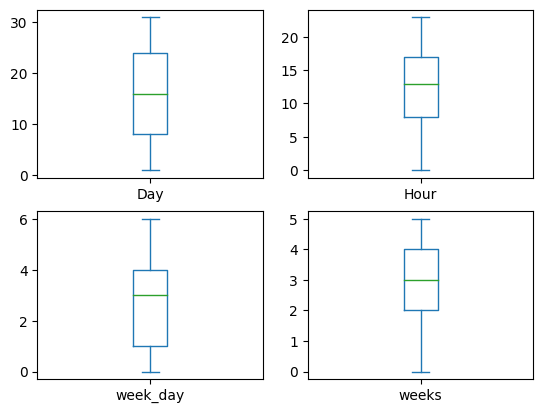

In [ ]:
dat_col = ['Day', 'Hour', 'week_day', 'weeks']
data[dat_col].plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)

plt.show()

array([[<Axes: title={'center': 'Day'}>,
        <Axes: title={'center': 'Hour'}>],
       [<Axes: title={'center': 'week_day'}>,
        <Axes: title={'center': 'weeks'}>]], dtype=object)

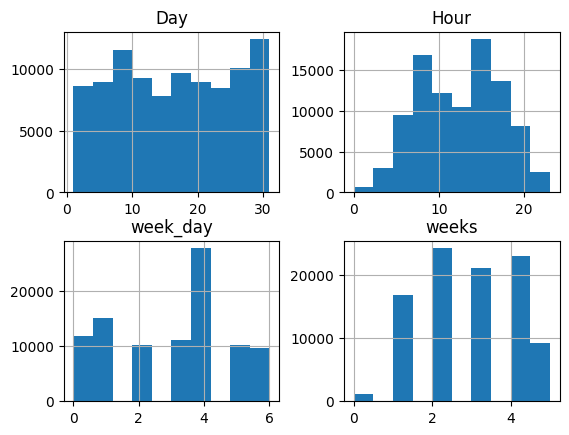

In [ ]:
data[dat_col].hist()

In [ ]:
data.columns

Index(['ProductCategory', 'Amount', 'Value', 'TransactionStartTime',
       'PricingStrategy', 'FraudResult', 'Day', 'Hour', 'week_day', 'weeks',
       'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'ProviderId',
       'ProductId', 'ChannelId'],
      dtype='object')

LR 0.9983274323047945
CART 0.999470355107606
KNN 0.9993588490793113
NB 0.9962227735047438
LDA 0.9981183590845424
SVM 0.9994982298662785
[array([0.99836929, 0.99811834, 0.99849467]), array([0.9993728 , 0.99954004, 0.99949822]), array([0.9993728 , 0.99937278, 0.99933096]), array([0.9971149 , 0.99535856, 0.99619486]), array([0.99832748, 0.99803471, 0.99799289]), array([0.99949824, 0.99962367, 0.99937278])]


C:\Users\sarah\AppData\Local\Temp\ipykernel_19160\2002969561.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(modelnames)


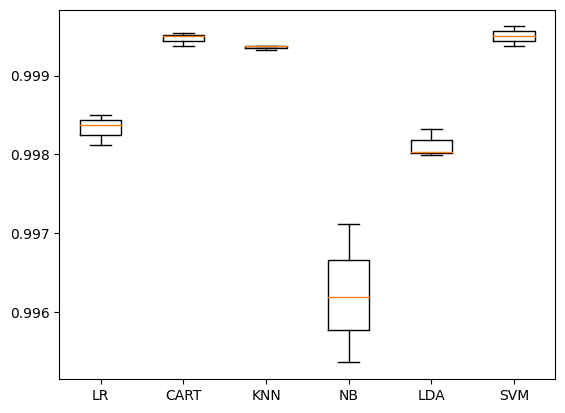

In [ ]:

# Building Models for iris flower classification
clo_n = ['Amount','Value','PricingStrategy','Day', 'Hour', 'week_day', 'weeks']
train_X1 = train_X[clo_n].copy()
val_X1 = val_X[clo_n].copy()

np.random.seed(1000)
# making a list of ml classification models
models = []

def classification_Models(train_X, val_X, train_y, val_y ):
    

    
    models.append( ('LR',  LogisticRegression()) )
    models.append( ('CART',DecisionTreeClassifier()) )
    models.append( ('KNN', KNeighborsClassifier()) )
    models.append( ('NB',  GaussianNB()) )
    models.append( ('LDA',  LinearDiscriminantAnalysis()) )
    models.append( ('SVM',  SVC()) )

    modeloutcomes = []
    modelnames = []
    for name,model in models:
        v_results = cross_val_score(model, train_X, train_y, cv = 3, 
                                     scoring='accuracy', n_jobs = -1, verbose = 0)
        print(name,v_results.mean())
        modeloutcomes.append(v_results)
        modelnames.append(name)
        
    print(modeloutcomes)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xticklabels(modelnames)
    plt.boxplot(modeloutcomes)
        
classification_Models(train_X1,val_X1, train_y, val_y)

In [ ]:
# Evaluating and predicting models


for name,model in models:
    trainedmodel = model.fit(train_X1,train_y)
    
    # prediction
    ypredict = trainedmodel.predict(val_X1)
    
    acc = accuracy_score(val_y,ypredict)
    classreport = classification_report(val_y,ypredict)
    confMat = confusion_matrix(val_y,ypredict)
    
    print('\n****************************'+name)
    print('The accuracy: {}'.format(acc))
    print('The Classification Report:\n {}'.format(classreport))
    print('The Confusion Matrix:\n {}'.format(confMat))
    
    """ 
    # save models
    import pickle as pk
    
    with open('model_'+name+'.pickle','wb') as f:
        pk.dump(trainedmodel,f)
    """
    


****************************LR
The accuracy: 0.9984111055360428
The Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23876
           1       0.55      0.30      0.39        40

    accuracy                           1.00     23916
   macro avg       0.77      0.65      0.69     23916
weighted avg       1.00      1.00      1.00     23916

The Confusion Matrix:
 [[23866    10]
 [   28    12]]

****************************CART
The accuracy: 0.9994564308412778
The Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     23876
           1       0.83      0.85      0.84        40

    accuracy                           1.00     23916
   macro avg       0.91      0.92      0.92     23916
weighted avg       1.00      1.00      1.00     23916

The Confusion Matrix:
 [[23869     7]
 [    6    34]]

****************************KNN
The accuracy: 0.9

In [ ]:
test =9